In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt 
from pypfopt import risk_models
from pypfopt import EfficientFrontier
from pypfopt import expected_returns
from pypfopt import hierarchical_portfolio

In [121]:
ticker = ["TCS.BO","LT.BO","INFY.BO","AXISBANK.BO","HINDUNILVR.BO","HCLTECH.BO","WIPRO.BO","ICICIBANK.BO","BAJAJFINSV.BO","RELIANCE.BO","TECHM.BO","BAJFINANCE.BO","M&M.BO","MARUTI.BO","ULTRACEMCO.BO","POWERGRID.BO","SBIN.BO","BHARTIARTL.BO","TITAN.BO","INDUSINDBK.BO","ITC.BO","HDFCBANK.BO","TATASTEEL.BO","TATAMOTORS.BO","NTPC.BO","ASIANPAINT.BO","KOTAKBANK.BO","JSWSTEEL.BO","SUNPHARMA.BO","NESTLEIND.BO"]
prices=pd.DataFrame()

In [122]:
end_date=dt.datetime(2024,1,10)
years=1
start_date=end_date-dt.timedelta(365*years)
for i in ticker:
    prices_data=yf.download(i,start_date,end_date)
    prices[i]=prices_data["Adj Close"]
print(prices)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [123]:
daily_return=prices.pct_change().dropna()
daily_return

,TCS.BO,LT.BO,INFY.BO,AXISBANK.BO,HINDUNILVR.BO,HCLTECH.BO,WIPRO.BO,ICICIBANK.BO,BAJAJFINSV.BO,RELIANCE.BO,...,ITC.BO,HDFCBANK.BO,TATASTEEL.BO,TATAMOTORS.BO,NTPC.BO,ASIANPAINT.BO,KOTAKBANK.BO,JSWSTEEL.BO,SUNPHARMA.BO,NESTLEIND.BO
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-11,0.012979,0.008735,0.000714,-0.001996,-0.018856,-0.009624,0.002290,0.008600,-0.009480,-0.012686,...,-0.004949,0.013700,-0.000421,0.012105,-0.011022,-0.006857,0.003703,0.012351,0.016459,-0.012825
2023-01-12,0.001727,0.016636,0.006184,-0.015421,-0.001947,0.016212,0.001269,-0.007663,-0.008749,-0.021144,...,-0.006330,0.005595,-0.006313,-0.013993,-0.000904,-0.008282,-0.012622,0.012266,0.004765,0.005842
2023-01-13,0.011875,-0.002986,0.015501,-0.001229,0.012728,0.005644,-0.002028,0.013992,0.002702,-0.001921,...,-0.002579,0.000719,0.020330,-0.001820,0.011758,-0.002264,0.000169,0.006812,-0.002517,-0.004862
2023-01-16,0.010669,-0.007220,0.014466,-0.022586,-0.009383,0.014797,0.012702,-0.008818,-0.005246,-0.009180,...,0.003346,-0.009745,-0.004151,0.004132,-0.011621,0.002698,0.003146,-0.012101,0.004803,-0.002083
2023-01-17,0.013331,0.035053,0.009507,0.005038,0.026664,0.015632,-0.006271,-0.000058,-0.008127,0.013846,...,0.007275,0.014730,-0.005002,0.005083,0.010552,0.008330,0.005909,-0.002832,-0.002994,0.009364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,-0.024238,0.000567,-0.029154,0.006131,-0.003138,-0.021543,-0.028243,0.002189,-0.005573,-0.010705,...,0.015208,-0.015536,-0.030455,-0.004079,0.000654,-0.005589,0.000751,-0.037639,0.001311,-0.021687
2024-01-04,-0.006650,0.005260,0.014763,0.022282,-0.005028,-0.012417,-0.007348,0.002235,0.014488,0.005594,...,-0.003143,0.010312,-0.007761,0.018302,0.035429,0.002299,-0.001554,-0.000597,0.011209,0.017855
2024-01-05,0.019294,0.016160,0.013689,0.011610,0.010840,0.009298,0.009281,0.007755,0.004555,0.003600,...,-0.003993,-0.004497,-0.004469,-0.006410,-0.006623,-0.007058,-0.008318,-0.008604,-0.009751,-0.016485


In [124]:
esg_risk_rating_data=pd.read_excel('C:\\term 6\project work\phase 2\ESG ratings.xlsx')

In [125]:
def color_risk(value):
    if value == 'Severe':
        color = 'red'
    elif value == 'High Risk':
        color = 'orange'
    elif value == 'Medium Risk':
        color = 'yellow'
    elif value == 'Low Risk':
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color
esg_risk_rating_data.style.applymap(color_risk, subset=['Type of Risk'])

C:\Users\manda\AppData\Local\Temp\ipykernel_20548\4184455370.py:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  esg_risk_rating_data.style.applymap(color_risk, subset=['Type of Risk'])


,Company_Ticker,ESG Risk Ratings,Type of Risk
0,TCS.BO,14.300000,Low Risk
1,LT.BO,32.700000,High Risk
2,INFY.BO,13.800000,Low Risk
3,AXISBANK.BO,23.500000,Medium Risk
4,HINDUNILVR.BO,22.700000,Medium Risk
5,HCLTECH.BO,12.300000,Low Risk
6,WIPRO.BO,14.400000,Low Risk
7,ICICIBANK.BO,23.300000,Medium Risk
8,BAJAJFINSV.BO,26.500000,Medium Risk
9,RELIANCE.BO,40.200000,Severe


In [126]:
esg_risk_rating_data=esg_risk_rating_data.sort_values(by='ESG Risk Ratings')
top_5=esg_risk_rating_data.head(5)
top_5

,Company_Ticker,ESG Risk Ratings,Type of Risk
5,HCLTECH.BO,12.3,Low Risk
10,TECHM.BO,12.4,Low Risk
2,INFY.BO,13.8,Low Risk
0,TCS.BO,14.3,Low Risk
6,WIPRO.BO,14.4,Low Risk


In [127]:
top_5_stocks=['HCLTECH.BO','TECHM.BO','INFY.BO','TCS.BO','WIPRO.BO']
top_5_stocks_prices=prices[top_5_stocks]
top_5_stocks_prices

,HCLTECH.BO,TECHM.BO,INFY.BO,TCS.BO,WIPRO.BO
Date,,,,,
2023-01-10,1028.359619,966.613525,1432.362061,3172.960693,392.083893
2023-01-11,1018.462585,970.180481,1433.384766,3214.141113,392.981720
2023-01-12,1034.973511,966.035034,1442.249512,3219.693115,393.480499
2023-01-13,1040.815063,967.047302,1464.605835,3257.928223,392.682434
2023-01-16,1056.215698,997.415161,1485.793091,3292.687744,397.670135
...,...,...,...,...,...
2024-01-03,1437.500000,1244.199951,1490.199951,3691.550049,455.899994
2024-01-04,1419.650024,1247.900024,1512.199951,3667.000000,452.549988
2024-01-05,1432.849976,1249.050049,1532.900024,3737.750000,456.750000


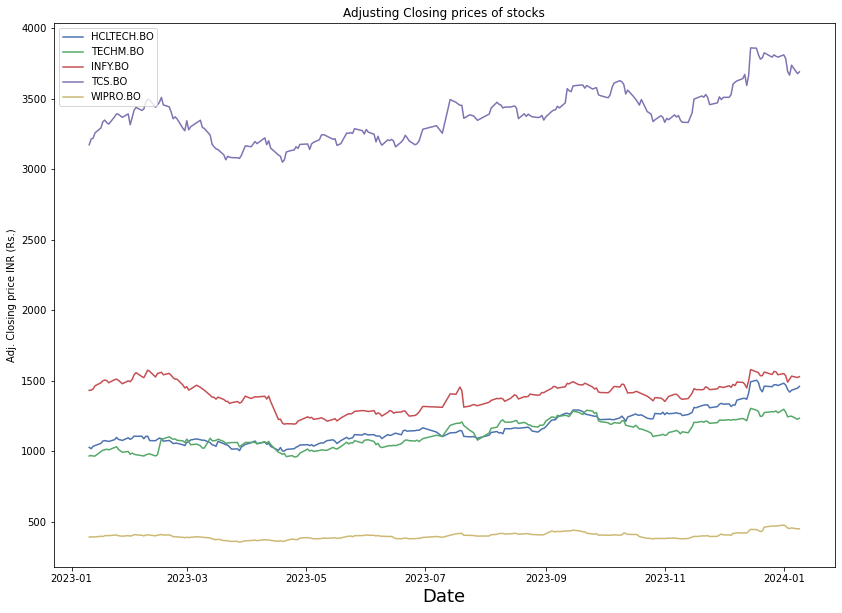

In [128]:
plt.figure(figsize=(14,10))
for c in top_5_stocks_prices.columns.values:
    plt.plot(top_5_stocks_prices[c],label=c)
plt.title("Adjusting Closing prices of stocks")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Closing price INR (Rs.)')
plt.legend(top_5_stocks_prices.columns.values, loc='upper left')
plt.show()

In [129]:
risk_free_rate_data = pd.read_csv('C:\\term 6\project work\phase 2\India 10-Year Bond Yield Historical Data(2).csv', index_col=0)
print(risk_free_rate_data)
risk_free_rate_data.reset_index(inplace=True)
print(risk_free_rate_data.columns)

            Price
Date             
10-01-2023  7.313
11-01-2023  7.291
12-01-2023  7.286
13-01-2023  7.299
16-01-2023  7.327
...           ...
04-01-2024  7.220
05-01-2024  7.235
08-01-2024  7.203
09-01-2024  7.189
10-01-2024  7.187

[245 rows x 1 columns]
Index(['Date', 'Price'], dtype='object')


In [130]:
risk_free_rate_data['Date'] = pd.to_datetime(risk_free_rate_data['Date'], format='%d-%m-%Y')
risk_free_rate_data.set_index('Date', inplace=True)
print(risk_free_rate_data)

            Price
Date             
2023-01-10  7.313
2023-01-11  7.291
2023-01-12  7.286
2023-01-13  7.299
2023-01-16  7.327
...           ...
2024-01-04  7.220
2024-01-05  7.235
2024-01-08  7.203
2024-01-09  7.189
2024-01-10  7.187

[245 rows x 1 columns]


In [131]:
annual_rf=risk_free_rate_data['Price'].mean()/100
print(f"The annual risk free rate is: {annual_rf*100:.2f}%")

The annual risk free rate is: 7.21%


In [132]:
daily_return_top_5_stocks=top_5_stocks_prices.pct_change().dropna()
daily_return_top_5_stocks

,HCLTECH.BO,TECHM.BO,INFY.BO,TCS.BO,WIPRO.BO
Date,,,,,
2023-01-11,-0.009624,0.003690,0.000714,0.012979,0.002290
2023-01-12,0.016212,-0.004273,0.006184,0.001727,0.001269
2023-01-13,0.005644,0.001048,0.015501,0.011875,-0.002028
2023-01-16,0.014797,0.031403,0.014466,0.010669,0.012702
2023-01-17,0.015632,0.010729,0.009507,0.013331,-0.006271
...,...,...,...,...,...
2024-01-03,-0.021543,-0.026371,-0.029154,-0.024238,-0.028243
2024-01-04,-0.012417,0.002974,0.014763,-0.006650,-0.007348
2024-01-05,0.009298,0.000922,0.013689,0.019294,0.009281


In [133]:
cov_matrix_annual=daily_return_top_5_stocks.cov()*252
cov_matrix_annual

,HCLTECH.BO,TECHM.BO,INFY.BO,TCS.BO,WIPRO.BO
HCLTECH.BO,0.042650,0.025290,0.031133,0.023559,0.025183
TECHM.BO,0.025290,0.066113,0.036154,0.027828,0.030764
INFY.BO,0.031133,0.036154,0.060056,0.032483,0.030244
TCS.BO,0.023559,0.027828,0.032483,0.035130,0.023806
WIPRO.BO,0.025183,0.030764,0.030244,0.023806,0.041206


In [134]:
weights=np.array([1/len(top_5)]*len(top_5))
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [135]:
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_volatility=np.sqrt(port_variance)

In [136]:
port_return=np.sum(daily_return_top_5_stocks.mean()*weights)*252
print(f"Expected annual return(equally weighted portfolio): {port_return*100:.1f}%")
print(f"Annual volatility(equally weighted portfolio): {port_volatility*100:.1f}%")
sr = (port_return - annual_rf) / port_volatility
print(f"Sharpe Ratio: {sr:.2f}")

Expected annual return(equally weighted portfolio): 23.3%
Annual volatility(equally weighted portfolio): 18.1%
Sharpe Ratio: 0.89


In [142]:
ret=expected_returns.mean_historical_return(top_5_stocks_prices)
risk=risk_models.sample_cov(top_5_stocks_prices)
risk

,HCLTECH.BO,TECHM.BO,INFY.BO,TCS.BO,WIPRO.BO
HCLTECH.BO,0.042650,0.025290,0.031133,0.023559,0.025183
TECHM.BO,0.025290,0.066113,0.036154,0.027828,0.030764
INFY.BO,0.031133,0.036154,0.060056,0.032483,0.030244
TCS.BO,0.023559,0.027828,0.032483,0.035130,0.023806
WIPRO.BO,0.025183,0.030764,0.030244,0.023806,0.041206


In [138]:
top_5_stocks_prices_opt=EfficientFrontier(ret,risk)
raw_weights=top_5_stocks_prices_opt.max_sharpe(risk_free_rate=annual_rf)
cleaned_weights = top_5_stocks_prices_opt.clean_weights()
top_5_stocks_prices_opt.portfolio_performance(verbose=True)

Expected annual return: 46.8%
Annual volatility: 20.6%
Sharpe Ratio: 1.92


c:\Users\manda\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.4684834740330282, 0.2064696612141472, 1.9196774246232835)

In [141]:
raw_weights

OrderedDict([('HCLTECH.BO', 0.9994092140670257),
             ('TECHM.BO', 0.0005907859329743),
             ('INFY.BO', 0.0),
             ('TCS.BO', 0.0),
             ('WIPRO.BO', 0.0)])

In [139]:
for key, value in cleaned_weights.items():
    print(f"{key}: {value:.2f}")

HCLTECH.BO: 1.00
TECHM.BO: 0.00
INFY.BO: 0.00
TCS.BO: 0.00
WIPRO.BO: 0.00


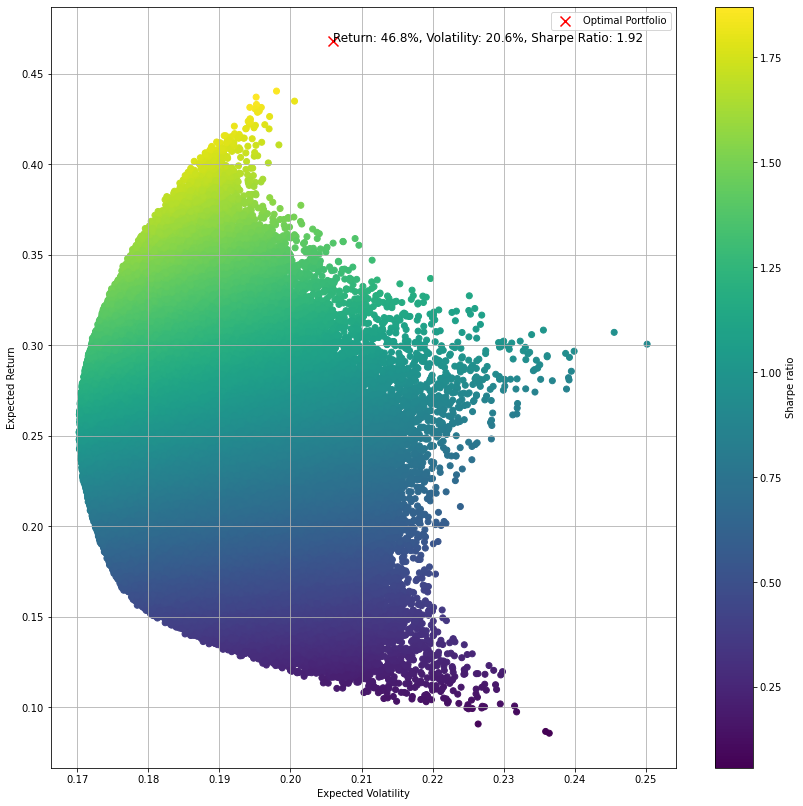

In [144]:
import numpy as np
import matplotlib.pyplot as plt

num_portfolios = 1000000

# Risk free rate
risk_free_rate = annual_rf  # replace with your value

# Initialize arrays to store the portfolio weights, returns and volatilities
weights_arr = np.zeros((num_portfolios, len(ret)))
returns_arr = np.zeros(num_portfolios)
volatility_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # Generate random portfolio weights that sum to 1
    weights = np.random.random(len(ret))
    weights /= np.sum(weights)
    weights_arr[i, :] = weights

    # Calculate the portfolio return and volatility
    returns_arr[i] = np.sum(ret * weights)
    volatility_arr[i] = np.sqrt(np.dot(weights.T, np.dot(risk, weights)))

# Calculate the Sharpe Ratio for each portfolio
sharpe_ratio_arr = (returns_arr - risk_free_rate) / volatility_arr

# Plot the efficient frontier
plt.figure(figsize=(14, 14))
plt.scatter(volatility_arr, returns_arr, c=sharpe_ratio_arr, marker='o')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe ratio')

# Add a marker for the given optimal portfolio
optimal_volatility = 0.206  # replace with your value
optimal_return = 0.468  # replace with your value
optimal_sharpe = 1.92  # replace with your value
plt.scatter(optimal_volatility, optimal_return, marker='x', color='r', s=100, label='Optimal Portfolio')
plt.text(optimal_volatility, optimal_return, f'Return: {optimal_return*100:.1f}%, Volatility: {optimal_volatility*100:.1f}%, Sharpe Ratio: {optimal_sharpe:.2f}', fontsize=12)
plt.legend()

plt.show()